# Data EDA

In [1]:
%matplotlib inline
from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# just for the sake of this blog post!
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# load the provided data
train_features = pd.read_csv('data/final_dengue_features_train.csv')

train_labels = pd.read_csv('data/final_dengue_labels_train.csv')

In [3]:
# 圣胡安数据分离
sj_train_features = train_features[train_features['city'] == 1]
sj_train_labels = train_labels[train_labels['city'] ==1]

# 伊基托斯数据分离
iq_train_features = train_features[train_features['city'] == 0]
iq_train_labels = train_labels[train_labels['city'] == 0]

In [4]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (936, 24)
labels  :  (936, 4)

Iquitos
features:  (520, 24)
labels  :  (520, 4)


In [5]:
sj_train_features.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city
0,1990,18,726587,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,1
1,1990,19,726594,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,1
2,1990,20,726601,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,1
3,1990,21,726608,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,1
4,1990,22,726615,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,1


In [6]:
# Remove `week_start_date` string.
sj_train_features.drop(['week_start_date','city'], axis=1, inplace=True)
iq_train_features.drop(['week_start_date','city'], axis=1, inplace=True)
sj_train_labels.drop('city', axis=1, inplace=True)
iq_train_labels.drop('city', axis=1, inplace=True)

In [7]:
# Merge the datasets on common columns
sj_df = pd.merge(sj_train_features, sj_train_labels, how="inner")
iq_df = pd.merge(iq_train_features, iq_train_labels, how="inner")
# 前移一周
sj_df['total_cases'] = sj_df['total_cases'].shift(-1)
iq_df['total_cases'] = iq_df['total_cases'].shift(-1)
# 刪除最後一個
sj_df = sj_df.iloc[:-1].reset_index(drop=True)
sj_df['total_cases'] = sj_df['total_cases'].astype(int)
iq_df = iq_df.iloc[:-1].reset_index(drop=True)
iq_df['total_cases'] = iq_df['total_cases'].astype(int)
#split
train_df_sj = sj_df.head(600)
test_df_sj = sj_df.tail(sj_df.shape[0] - 600) #936-800 = 136
train_df_iq = iq_df.head(400)
test_df_iq = iq_df.tail(iq_df.shape[0] - 400) #936-800 = 136
# 確保數據按照時間順序排列
train_df_sj = train_df_sj.sort_values(by=["year", "weekofyear"])
test_df_sj = test_df_sj.sort_values(by=["year", "weekofyear"])
train_df_iq = train_df_iq.sort_values(by=["year", "weekofyear"])
test_df_iq = test_df_iq.sort_values(by=["year", "weekofyear"])

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5559.3916 - val_loss: 796.7330
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5221.2222 - val_loss: 653.8141
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4184.8936 - val_loss: 667.1885
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4034.2173 - val_loss: 818.5299
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4489.0195 - val_loss: 967.7729
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3467.3501 - val_loss: 1103.1984
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3583.3499 - val_loss: 1151.5435
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3118.6035 - val_loss: 1159.7170
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3941.1277 - val_loss: 1163.5967
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3776.4092 - val_loss: 1170.9347
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3069.1609 - val_loss: 1121.3632
Epoch 12/50


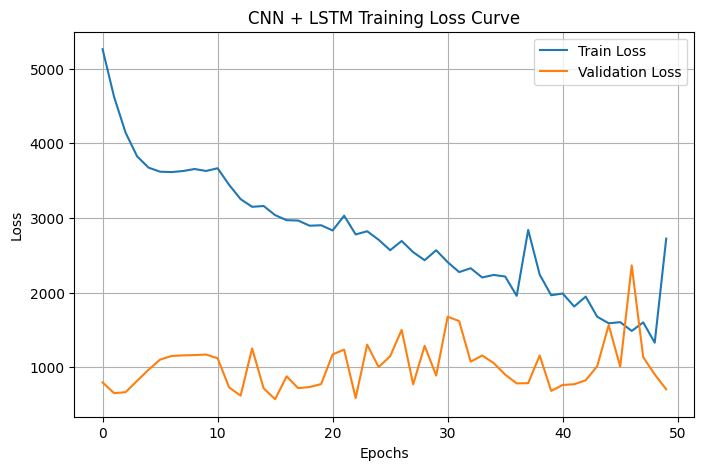

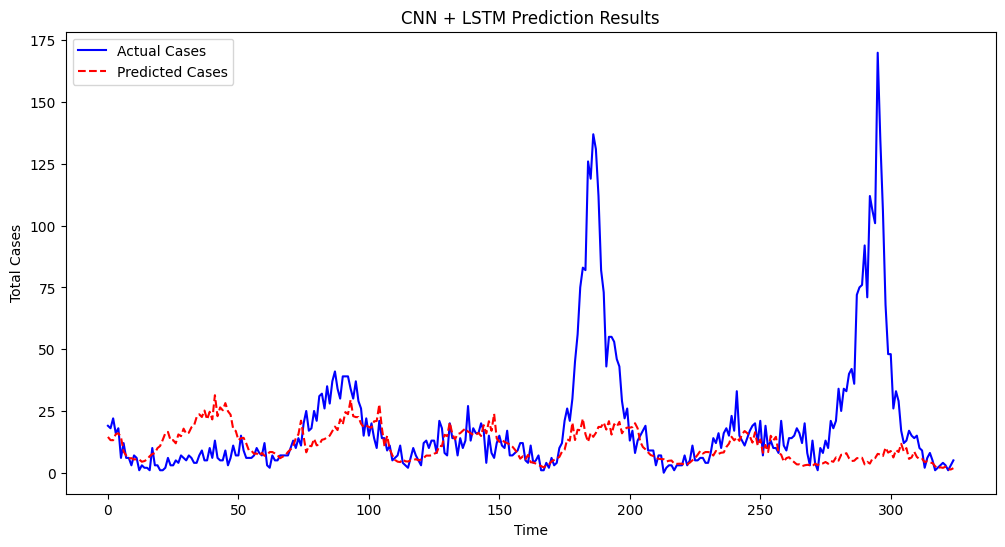

In [8]:
# 構建 CNN + LSTM 模型(sj)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D


# 選擇要預測的目標變數
target = ['total_cases']
X_train = train_df_sj.drop(columns=target).values
y_train = train_df_sj[target].values
X_test = test_df_sj.drop(columns=target).values
y_test = test_df_sj[target].values

# 標準化數據
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 轉換為 3D 時序格式 (samples, time steps, features)
def create_sequences(X, y, time_steps=2):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10  # 設定時序窗口大小
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, time_steps)
model_sj = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_steps, X_train.shape[1])),
    MaxPooling1D(pool_size=2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # 預測值輸出層
])

model_sj.compile(optimizer='adam', loss='mse')

# 訓練模型
history = model_sj.fit(X_train_seq, y_train_seq, epochs=50, batch_size=16, validation_data=(X_test_seq, y_test_seq))

# 預測
y_pred = model_sj.predict(X_test_seq)

# 視覺化損失曲線
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("CNN + LSTM Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

# 視覺化預測結果
plt.figure(figsize=(12, 6))
plt.plot(y_test_seq, label="Actual Cases", color='blue')
plt.plot(y_pred, label="Predicted Cases", color='red', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("Total Cases")
plt.title("CNN + LSTM Prediction Results")
plt.legend()
plt.show()


[I 2025-03-11 17:00:10,817] A new study created in memory with name: no-name-07c2dc33-03fe-44c8-b51e-33426bdcb9d2
[I 2025-03-11 17:00:18,622] Trial 0 finished with value: 638.4779663085938 and parameters: {'filters': 112, 'kernel_size': 4, 'lstm_units': 128, 'dropout_rate': 0.23458702893792213, 'dense_units': 48, 'learning_rate': 0.00025492953260108084, 'epochs': 90, 'batch_size': 16}. Best is trial 0 with value: 638.4779663085938.
[I 2025-03-11 17:00:24,462] Trial 1 finished with value: 633.2218627929688 and parameters: {'filters': 112, 'kernel_size': 4, 'lstm_units': 32, 'dropout_rate': 0.2739658048771183, 'dense_units': 96, 'learning_rate': 0.0005255263176445434, 'epochs': 30, 'batch_size': 96}. Best is trial 1 with value: 633.2218627929688.
[I 2025-03-11 17:00:31,553] Trial 2 finished with value: 632.9711303710938 and parameters: {'filters': 64, 'kernel_size': 4, 'lstm_units': 128, 'dropout_rate': 0.3275437885290422, 'dense_units': 48, 'learning_rate': 0.00014290807468402613, 'epoc

Best hyperparameters: {'filters': 64, 'kernel_size': 4, 'lstm_units': 64, 'dropout_rate': 0.4064772031883625, 'dense_units': 112, 'learning_rate': 0.0014285585726718883, 'epochs': 20, 'batch_size': 32}
Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 4924.1865 - val_loss: 675.4858
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5308.5386 - val_loss: 833.6431
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3758.4282 - val_loss: 1055.2096
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3425.9614 - val_loss: 1015.0725
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4558.3613 - val_loss: 998.6384
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3103.1375 - val_loss: 1003.1962
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4408.1289 - val_loss: 1130.4663
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3106.2366 - val_loss: 1060.8030
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3696.4526 - va

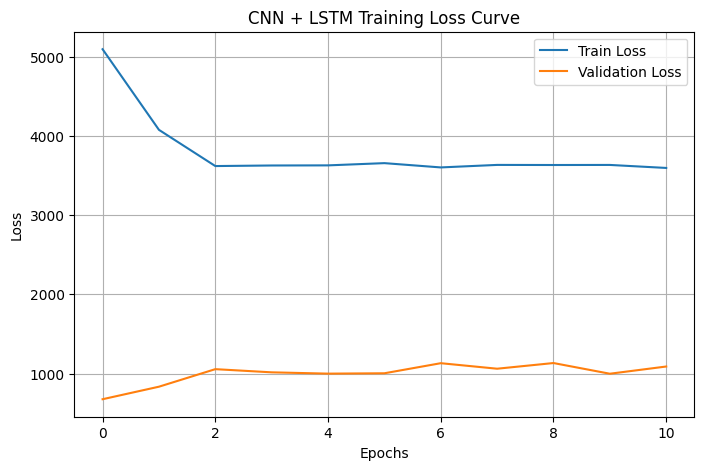

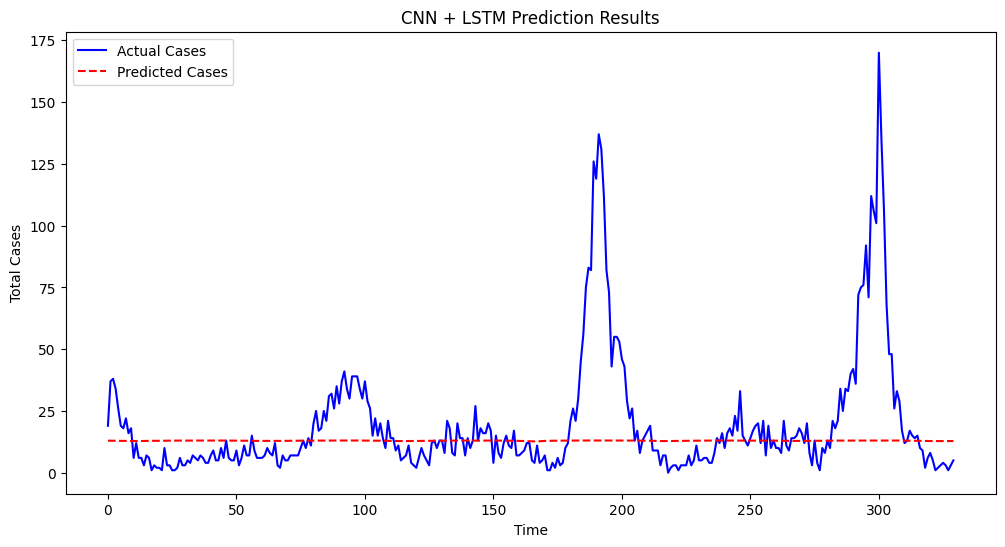

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Reshape
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import optuna

# 選擇要預測的目標變數
target = ['total_cases']
X_train = train_df_sj.drop(columns=target).values
y_train = train_df_sj[target].values
X_test = test_df_sj.drop(columns=target).values
y_test = test_df_sj[target].values

# 標準化數據
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time_steps = 5  # 讓模型參考 10 個時間點
X_train_seq = np.array([X_train_scaled[i-time_steps:i] for i in range(time_steps, len(X_train_scaled))])
y_train_seq = y_train[time_steps:]
X_test_seq = np.array([X_test_scaled[i-time_steps:i] for i in range(time_steps, len(X_test_scaled))])
y_test_seq = y_test[time_steps:]
# 定義 Optuna 目標函數

def objective(trial):
    model_sj = Sequential([
        Conv1D(
            padding="same", 
            filters=trial.suggest_int("filters", 64, 128, step=16),
            kernel_size=trial.suggest_int("kernel_size", 3, 5), 
            activation='relu', 
            input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])  # 確保正確的 3D 格式
        ),
        LSTM(trial.suggest_int("lstm_units", 32, 128, step=16), return_sequences=True),
        Dropout(trial.suggest_float("dropout_rate", 0.2, 0.5)),
        LSTM(trial.suggest_int("lstm_units", 32, 128, step=16), return_sequences=False),
        Dropout(trial.suggest_float("dropout_rate", 0.2, 0.5)),
        Dense(trial.suggest_int("dense_units", 16, 128, step=16), activation='relu', kernel_regularizer=l2(1e-4)),
        Dense(1)  # 預測值輸出層
    ])

    # 優化器 & 學習率
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipvalue=1.0)
    
    model_sj.compile(optimizer=optimizer, loss='mse')

    # 訓練模型
    epochs = trial.suggest_int("epochs", 20, 100, step=10)
    batch_size = trial.suggest_int("batch_size", 16, 128, step=16)

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    history = model_sj.fit(
        X_train_seq, y_train_seq, 
        epochs=epochs, batch_size=batch_size, 
        validation_data=(X_test_seq, y_test_seq), 
        callbacks=[early_stopping], verbose=0
    )
    return min(history.history['val_loss'])

# 執行 Optuna 超參數優化
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

# 最佳超參數
print("Best hyperparameters:", study.best_params)

# 最佳模型的訓練
tuned_params = study.best_params
best_model = Sequential([
    Conv1D(
        padding="same", 
        filters=tuned_params["filters"], 
        kernel_size=tuned_params["kernel_size"], 
        activation='relu', 
        input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])  # 保持 3D
    ),
    LSTM(tuned_params["lstm_units"], return_sequences=True),  # 需要 return_sequences=True，確保輸出 3D
    Dropout(tuned_params["dropout_rate"]),
    LSTM(tuned_params["lstm_units"], return_sequences=False),
    Dropout(tuned_params["dropout_rate"]),
    Dense(tuned_params["dense_units"], activation='relu', kernel_regularizer=l2(1e-4)),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=tuned_params["learning_rate"], clipvalue=1.0)
best_model.compile(optimizer=optimizer, loss='mse')

history = best_model.fit(
    X_train_seq, y_train_seq, 
    epochs=tuned_params["epochs"], batch_size=tuned_params["batch_size"], 
    validation_data=(X_test_seq, y_test_seq), 
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)], verbose=1
)

# 預測
y_pred = best_model.predict(X_test_seq)

# 視覺化損失曲線
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("CNN + LSTM Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

# 視覺化預測結果
plt.figure(figsize=(12, 6))
plt.plot(y_test_seq, label="Actual Cases", color='blue')
plt.plot(y_pred, label="Predicted Cases", color='red', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("Total Cases")
plt.title("CNN + LSTM Prediction Results")
plt.legend()
plt.show()


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 226.7377 - val_loss: 156.4257
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 165.1612 - val_loss: 129.5112
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.2752 - val_loss: 131.3042
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 180.2171 - val_loss: 129.7181
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 110.0972 - val_loss: 131.8281
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 114.5776 - val_loss: 129.6710
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 110.8362 - val_loss: 131.0984
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 114.8733 - val_loss: 130.9272
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 189.0128 - val_loss: 127.9957
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 160.1244 - val_loss: 129.9500
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 97.3193 - val_loss: 128.4360
Epoch 12/50
25/25 ━━━━━━━━━━━━━

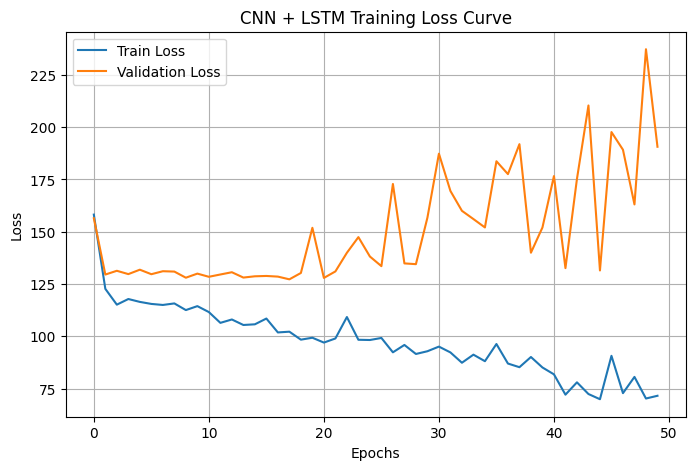

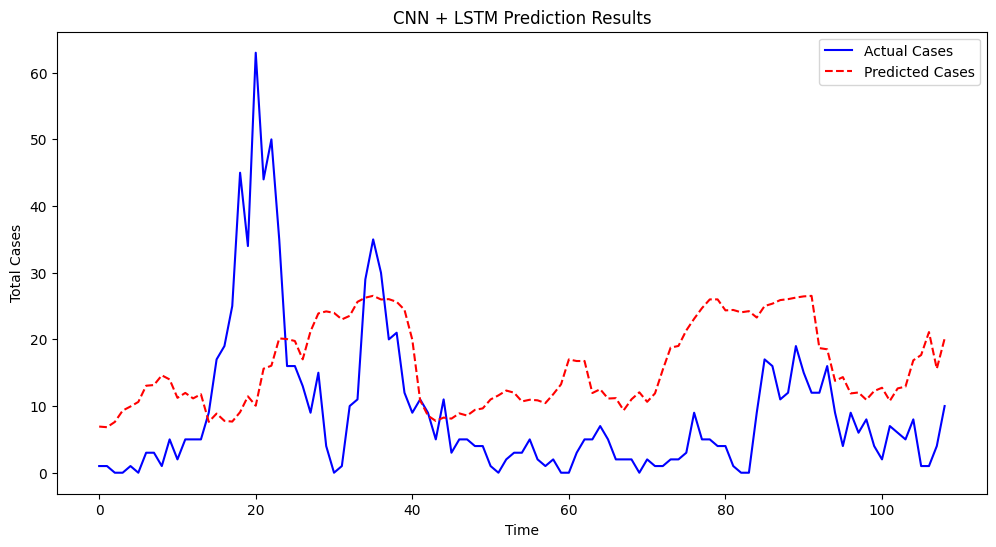

In [10]:
# 構建 CNN + LSTM 模型(iq)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D


# 選擇要預測的目標變數
target = ['total_cases']
X_train = train_df_iq.drop(columns=target).values
y_train = train_df_iq[target].values
X_test = test_df_iq.drop(columns=target).values
y_test = test_df_iq[target].values

# 標準化數據
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 轉換為 3D 時序格式 (samples, time steps, features)
def create_sequences(X, y, time_steps=2):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10  # 設定時序窗口大小
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, time_steps)
model_iq = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_steps, X_train.shape[1])),
    MaxPooling1D(pool_size=2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # 預測值輸出層
])

model_iq.compile(optimizer='adam', loss='mse')

# 訓練模型
history = model_iq.fit(X_train_seq, y_train_seq, epochs=50, batch_size=16, validation_data=(X_test_seq, y_test_seq))

# 預測
y_pred = model_iq.predict(X_test_seq)

# 視覺化損失曲線
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("CNN + LSTM Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

# 視覺化預測結果
plt.figure(figsize=(12, 6))
plt.plot(y_test_seq, label="Actual Cases", color='blue')
plt.plot(y_pred, label="Predicted Cases", color='red', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("Total Cases")
plt.title("CNN + LSTM Prediction Results")
plt.legend()
plt.show()


In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences

test_data =pd.read_csv("data/dengue_features_test.csv")
# 删除不必要的列（如果有）
test_data = test_data.drop(columns=['week_start_date'], errors='ignore')
# 圣胡安数据分离
test_data_sj = test_data[test_data['city'] == 'sj']
test_data_sj = test_data_sj.drop(columns=['city'], errors='ignore')
# 伊基托斯数据分离
test_data_iq = test_data[test_data['city'] == 'iq']
test_data_iq = test_data_iq.drop(columns=['city'], errors='ignore')
# # 归一化测试数据（使用训练时的 scaler）
X_test_scaled_sj = scaler.transform(test_data_sj.values)
X_test_scaled_iq = scaler.transform(test_data_iq.values)
print(len(X_test_scaled_sj)+len(X_test_scaled_iq))
# # # 创建时间序列数据
X_test_seq_sj, _ = create_sequences(X_test_scaled_sj, np.zeros(len(X_test_scaled_sj)), time_steps=2)  # 目标值设为0
X_test_seq_iq, _ = create_sequences(X_test_scaled_iq, np.zeros(len(X_test_scaled_iq)), time_steps=2)  # 目标值设为0

416


In [13]:
#獲取測試數據的長度
num_test_sj = len(X_test_scaled_sj)
num_test_iq = len(X_test_scaled_iq)

# 初始化預測結果
y_pred_sj = []
y_pred_iq = []

# 取最後一個時間窗口作為初始輸入
X_input_sj = X_test_scaled_sj[:time_steps].reshape(1, time_steps, -1)
X_input_iq = X_test_scaled_iq[:time_steps].reshape(1, time_steps, -1)

In [14]:
# 預測 San Juan
for i in range(num_test_sj):
    pred = model_sj.predict(X_input_sj, verbose=0)[0, 0]  # 取得預測值
    y_pred_sj.append(pred)

    # 更新窗口（去掉最舊的數據，加入新的預測值）
    X_input_sj = np.roll(X_input_sj, shift=-1, axis=1)
    X_input_sj[0, -1, -1] = pred  # 插入新的預測值

# 預測 Iquitos
for i in range(num_test_iq):
    pred = model_iq.predict(X_input_iq, verbose=0)[0, 0]  # 取得預測值
    y_pred_iq.append(pred)

    # 更新窗口（去掉最舊的數據，加入新的預測值）
    X_input_iq = np.roll(X_input_iq, shift=-1, axis=1)
    X_input_iq[0, -1, -1] = pred  # 插入新的預測值


In [15]:
# 將 y_pred_sj 和 y_pred_iq 轉換為整數
y_pred_sj = np.round(y_pred_sj).astype(int)
y_pred_iq = np.round(y_pred_iq).astype(int)
#寫入
benchmark_df = pd.read_csv("data/benchmark.csv")
num_sj = (benchmark_df['city'] == 'sj').sum()
num_iq = (benchmark_df['city'] == 'iq').sum()
benchmark_df.loc[benchmark_df['city'] == 'sj', 'total_cases'] = y_pred_sj[:num_sj]
benchmark_df.loc[benchmark_df['city'] == 'iq', 'total_cases'] = y_pred_iq[:num_iq]
output_path = "data/benchmark.csv"
benchmark_df.to_csv(output_path, index=False)


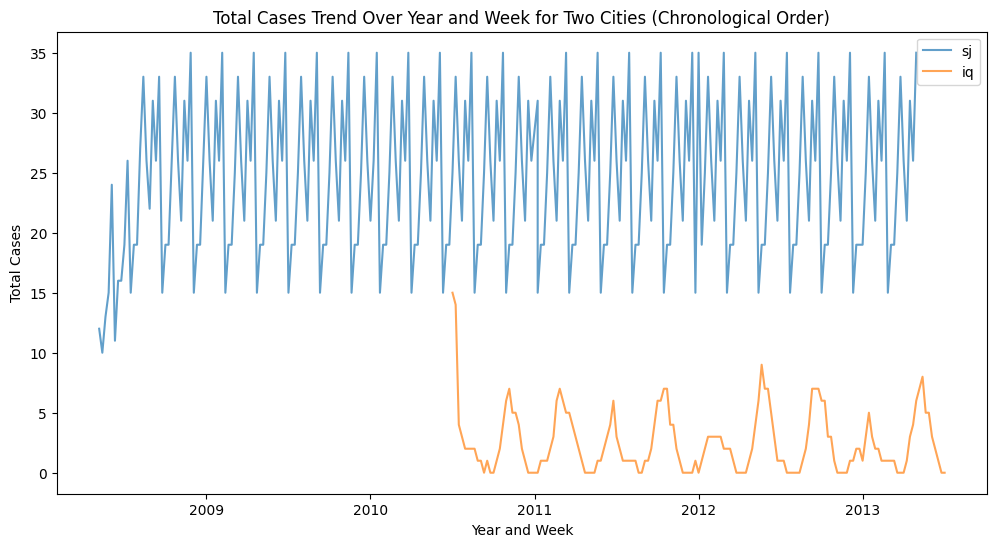

In [16]:
# # Sort the dataframe by city, year, and weekofyear to ensure chronological order
benchmark_df = benchmark_df.sort_values(by=['city', 'year', 'weekofyear'])
cities = ['sj', 'iq']
# Create the line plot
plt.figure(figsize=(12, 6))

# Plot data for each city
for city in cities:
    subset = benchmark_df[benchmark_df['city'] == city]
    plt.plot(subset['year'] + subset['weekofyear'] / 52, subset['total_cases'], label=city, alpha=0.7)

# Labels and title
plt.xlabel("Year and Week")
plt.ylabel("Total Cases")
plt.title("Total Cases Trend Over Year and Week for Two Cities (Chronological Order)")
plt.legend()
plt.show()
